In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.under_sampling import NearMiss, CondensedNearestNeighbour

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_train = pd.read_csv("application_train.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

### Data Type

In [6]:
int_col = df_train.columns[df_train.dtypes != "object"].tolist()

binary_col = df_train.columns[df_train.columns.str.contains('FLAG')]

non_binary_col = [ele for ele in int_col if len(df_train[ele].unique()) > 2]

In [7]:
for col in df_train[non_binary_col[2:]]:
    print(col, ": ", len(df_train[col].unique()))

AMT_INCOME_TOTAL :  2548
AMT_CREDIT :  5603
AMT_ANNUITY :  13673
AMT_GOODS_PRICE :  1003
REGION_POPULATION_RELATIVE :  81
DAYS_BIRTH :  17460
DAYS_EMPLOYED :  12574
DAYS_REGISTRATION :  15688
DAYS_ID_PUBLISH :  6168
OWN_CAR_AGE :  63
CNT_FAM_MEMBERS :  18
REGION_RATING_CLIENT :  3
REGION_RATING_CLIENT_W_CITY :  3
HOUR_APPR_PROCESS_START :  24
EXT_SOURCE_1 :  114585
EXT_SOURCE_2 :  119832
EXT_SOURCE_3 :  815
APARTMENTS_AVG :  2340
BASEMENTAREA_AVG :  3781
YEARS_BEGINEXPLUATATION_AVG :  286
YEARS_BUILD_AVG :  150
COMMONAREA_AVG :  3182
ELEVATORS_AVG :  258
ENTRANCES_AVG :  286
FLOORSMAX_AVG :  404
FLOORSMIN_AVG :  306
LANDAREA_AVG :  3528
LIVINGAPARTMENTS_AVG :  1869
LIVINGAREA_AVG :  5200
NONLIVINGAPARTMENTS_AVG :  387
NONLIVINGAREA_AVG :  3291
APARTMENTS_MODE :  761
BASEMENTAREA_MODE :  3842
YEARS_BEGINEXPLUATATION_MODE :  222
YEARS_BUILD_MODE :  155
COMMONAREA_MODE :  3129
ELEVATORS_MODE :  27
ENTRANCES_MODE :  31
FLOORSMAX_MODE :  26
FLOORSMIN_MODE :  26
LANDAREA_MODE :  3564
LIVINGA

In [8]:
# for col in df_train[non_binary_col[2:]]:
#     df_train.plot(kind = "scatter", x = col, y = 'TARGET')

In [9]:
# for col in df_train[non_binary_col[2:]]:
#     df_train[col].hist(bins = 12) #, by = 'Target'

### Missing Values

In [10]:
null_col = df_train.columns[df_train.isna().any()].tolist()

In [11]:
df_train[null_col].isna().sum()/len(df_train)

AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
OWN_CAR_AGE                     0.659908
OCCUPATION_TYPE                 0.313455
CNT_FAM_MEMBERS                 0.000007
EXT_SOURCE_1                    0.563811
EXT_SOURCE_2                    0.002146
EXT_SOURCE_3                    0.198253
APARTMENTS_AVG                  0.507497
BASEMENTAREA_AVG                0.585160
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BUILD_AVG                 0.664978
COMMONAREA_AVG                  0.698723
ELEVATORS_AVG                   0.532960
ENTRANCES_AVG                   0.503488
FLOORSMAX_AVG                   0.497608
FLOORSMIN_AVG                   0.678486
LANDAREA_AVG                    0.593767
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAREA_AVG                  0.501933
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAREA_AVG               0.551792
APARTMENTS_MODE                 0.507497
BASEMENTAREA_MOD

In [12]:
len(df_train[df_train.TARGET == 1])

24825

In [13]:
len(df_train[df_train.TARGET == 0])

282686

In [14]:
df_train[df_train.TARGET == 1][null_col].isna().sum()/len(df_train[df_train.TARGET == 1][null_col])

AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000846
NAME_TYPE_SUITE                 0.002820
OWN_CAR_AGE                     0.694824
OCCUPATION_TYPE                 0.252890
CNT_FAM_MEMBERS                 0.000000
EXT_SOURCE_1                    0.595005
EXT_SOURCE_2                    0.002095
EXT_SOURCE_3                    0.228681
APARTMENTS_AVG                  0.575428
BASEMENTAREA_AVG                0.646042
YEARS_BEGINEXPLUATATION_AVG     0.556213
YEARS_BUILD_AVG                 0.715045
COMMONAREA_AVG                  0.742115
ELEVATORS_AVG                   0.600806
ENTRANCES_AVG                   0.572447
FLOORSMAX_AVG                   0.566526
FLOORSMIN_AVG                   0.725398
LANDAREA_AVG                    0.648701
LIVINGAPARTMENTS_AVG            0.729990
LIVINGAREA_AVG                  0.568419
NONLIVINGAPARTMENTS_AVG         0.738248
NONLIVINGAREA_AVG               0.617523
APARTMENTS_MODE                 0.575428
BASEMENTAREA_MOD

---

## Scenario 1

1.drop all row with null values

2.variable selection (top 10 - 20)

3.Random Forest and LASSO Regression

In [15]:
df_notnull = df_train.dropna()

In [16]:
df_notnull.TARGET.value_counts()

0    8076
1     526
Name: TARGET, dtype: int64

In [17]:
from sklearn.preprocessing import OneHotEncoder

dummy = OneHotEncoder()

df_dummy = dummy.fit_transform(df_notnull)

In [18]:
df_dummy = pd.get_dummies(df_notnull)

df_dummy.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_E

### VIF

In [19]:
X = df_dummy[df_dummy.columns[2:]].reset_index(drop = True)
y = df_dummy['TARGET'].reset_index(drop = True)
len(X)

8602

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_list = []

for i in range(X.shape[1]):
    VIF_list.append(variance_inflation_factor(X.values, i))

VIF_series = pd.Series(VIF_list, index = X.columns).sort_values(ascending = False)

C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [21]:
df_VIF = pd.DataFrame(VIF_series).reset_index().rename(columns = {'index': 'variable', 0: 'VIF'})
VIF_important_feature = list(df_VIF[(np.isfinite(df_VIF.VIF)) & (df_VIF.VIF >= 100)]['variable'])

In [22]:
VIF_important_feature

['LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'ELEVATORS_MEDI',
 'FLOORSMAX_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'ELEVATORS_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAPARTMENTS_AVG',
 'ENTRANCES_AVG',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'FLOORSMIN_AVG',
 'NONLIVINGAPARTMENTS_MEDI']

### Correlation

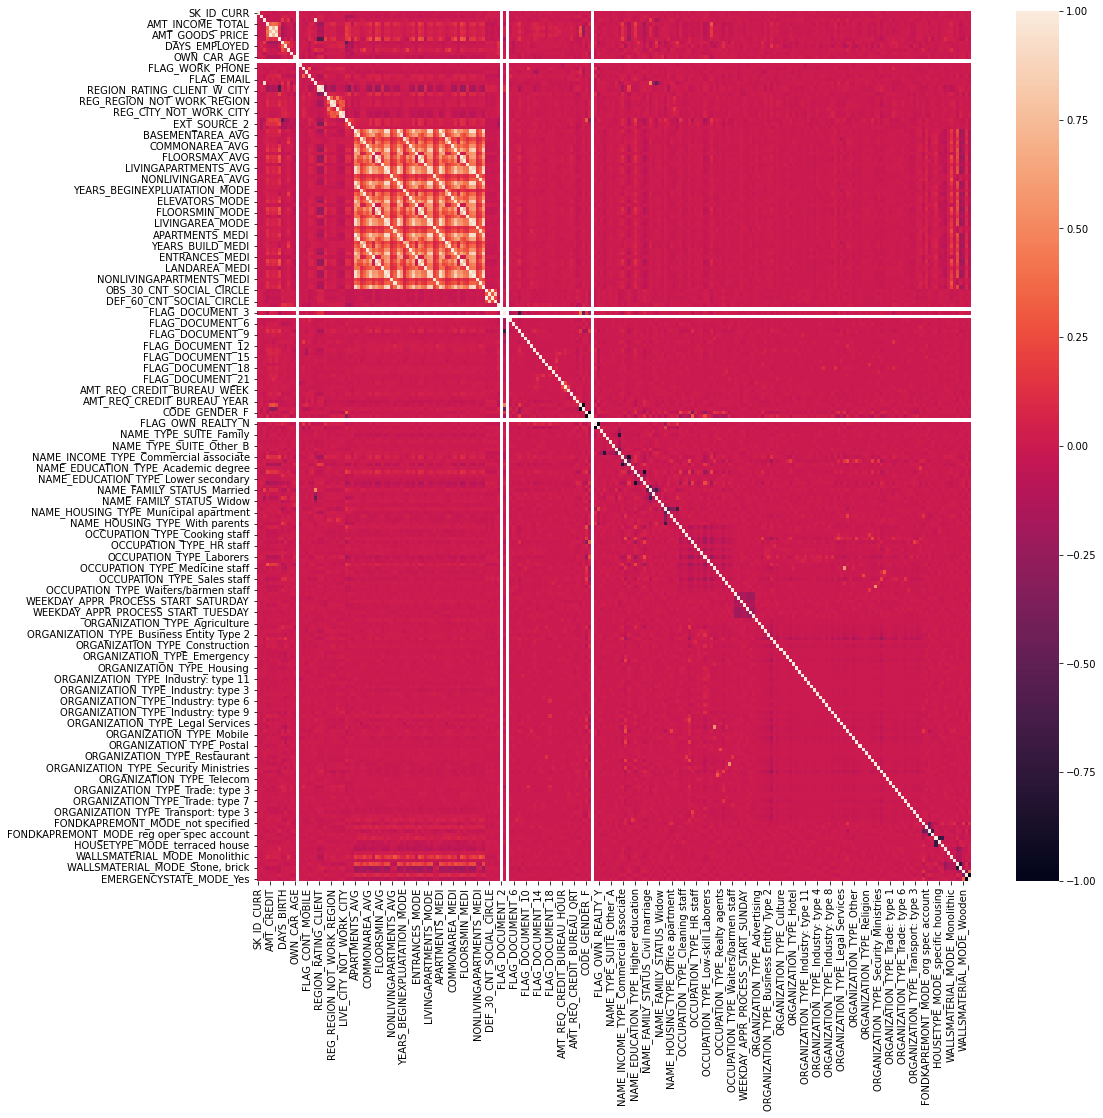

In [23]:
plt.figure(figsize = (16, 16))
sns.heatmap(df_dummy.corr())
plt.show()

In [24]:
df_corr = pd.DataFrame(df_dummy.corr()['TARGET']).reset_index().rename(columns={'index': 'variable', 'TARGET': 'correlation'}).sort_values(by = 'correlation', ascending = False)
correlation_important_feature = list(df_corr[abs(df_corr.correlation) >= 0.05]['variable'])

In [25]:
correlation_important_feature

['TARGET',
 'DAYS_EMPLOYED',
 'REGION_RATING_CLIENT_W_CITY',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'FLAG_DOCUMENT_3',
 'REGION_RATING_CLIENT',
 'NAME_EDUCATION_TYPE_Higher education',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

### Split Data

In [26]:
important_feature = list(set(VIF_important_feature + correlation_important_feature))
df_important = df_dummy[important_feature]

X_columns = [i for i in important_feature if i != 'TARGET']

In [27]:
X_important = df_important[X_columns].reset_index(drop = True)
y_important = df_important['TARGET'].reset_index(drop = True)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

x_train_imp, x_test_imp, y_train_imp, y_test_imp = train_test_split(X_important, y_important, test_size = 0.20, random_state = 0)

In [29]:
x_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZ

In [30]:
x_train_imp.head()

,REGION_RATING_CLIENT_W_CITY,LIVINGAPARTMENTS_AVG,FLOORSMIN_AVG,YEARS_BUILD_MEDI,COMMONAREA_AVG,FLOORSMAX_AVG,APARTMENTS_AVG,FLAG_DOCUMENT_3,FLOORSMAX_MEDI,LIVINGAPARTMENTS_MEDI,EXT_SOURCE_1,OBS_60_CNT_SOCIAL_CIRCLE,ENTRANCES_MEDI,NAME_EDUCATION_TYPE_Secondary / secondary special,ELEVATORS_MEDI,EXT_SOURCE_3,REGION_RATING_CLIENT,ENTRANCES_AVG,NAME_EDUCATION_TYPE_Higher education,OBS_30_CNT_SOCIAL_CIRCLE,DAYS_EMPLOYED,FLOORSMIN_MEDI,EXT_SOURCE_2,APARTMENTS_MEDI,COMMONAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,ELEVATORS_AVG,LIVINGAREA_MEDI,LIVINGAREA_AVG,YEARS_BUILD_AVG
420,1,0.1866,0.5833,0.8121,0.1238,0.5417,0.2289,1,0.5417,0.1898,0.557919,2.0,0.1379,1,0.32,0.384207,1,0.1379,0,2.0,-1427,0.5833,0.795243,0.2311,0.1245,0.0000,0.32,0.2588,0.2542,0.8096
5379,1,0.0933,0.6667,0.7518,0.0000,0.6250,0.1165,1,0.6250,0.0949,0.530992,0.0,0.0345,0,0.08,0.269286,1,0.0345,1,0.0,-2212,0.6667,0.554848,0.1176,0.0000,0.0039,0.08,0.1069,0.1051,0.7484
5524,2,0.0202,0.1250,0.8189,0.0000,0.0833,0.0247,0,0.0833,0.0205,0.639601,0.0,0.1379,1,0.00,0.641368,2,0.1379,0,0.0,-1592,0.1250,0.544022,0.0250,0.0000,0.0000,0.00,0.0306,0.0301,0.8164
7978,3,0.0605,0.3750,0.8658,0.0270,0.3333,0.0753,1,0.3333,0.0616,0.612228,0.0,0.0690,1,0.08,0.746300,3,0.0690,0,0.0,-8118,0.3750,0.651048,0.0760,0.0272,0.0039,0.08,0.0779,0.0766,0.8640
6798,1,0.1698,0.0417,0.9799,0.0651,0.3333,0.2206,0,0.3333,0.1727,0.709998,0.0,0.2069,0,0.24,0.577969,1,0.2069,1,0.0,-3917,0.0417,0.714560,0.2228,0.0656,0.0466,0.24,0.2583,0.2538,0.9796


### Random Forest

In [31]:
rfc = RandomForestClassifier(n_estimators = 20, random_state = 0)

rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

rfc.feature_importances_.argsort()[::-1]

score:0.9320162696106915


array([ 29,  27,  28,   8,   2,   3,   9,   7,  62,   6,  41,  77,  67,
        34,   4,  39,  55,  53,  72,  46,  69,  48,  32,  33,  47,  44,
        68,  30,  20,  58,   5,  40,  31, 103,  45,  10,  71,   1,  60,
        54,  59,  57,  36,  61,  75,  73,  43,  64,  66,  42,  52,  56,
        70,  50,   0,  18,  38,  35, 101,  65,  37,  74, 167,  17,  63,
       122,  79,  76, 102, 126, 132, 156, 112,  51, 136,  49, 127, 203,
       141, 228,  19, 145, 229, 159, 109,  13, 116, 155,  15, 147, 161,
       219, 110, 214, 118, 120,  84, 151, 117, 208,  16, 220,  24,  22,
       128, 125, 153, 215, 129, 217, 106, 191, 107, 133, 163,  25, 166,
       224, 140, 192, 146, 157, 185, 225, 197, 169,  26,  85, 165, 143,
       201, 211, 149, 138,  23, 178,  98, 160,  99, 137, 173, 139, 168,
       144, 162, 202, 218, 194, 111, 175,  21, 207, 154, 114, 104, 195,
       131, 182, 221, 227, 123, 231, 119, 115,  94, 124, 158,  91, 189,
       172, 187, 226,  14, 222, 232,  90, 105, 196, 177, 180, 13

In [32]:
pd.Series(X.columns)

0                                           CNT_CHILDREN
1                                       AMT_INCOME_TOTAL
2                                             AMT_CREDIT
3                                            AMT_ANNUITY
4                                        AMT_GOODS_PRICE
5                             REGION_POPULATION_RELATIVE
6                                             DAYS_BIRTH
7                                          DAYS_EMPLOYED
8                                      DAYS_REGISTRATION
9                                        DAYS_ID_PUBLISH
10                                           OWN_CAR_AGE
11                                            FLAG_MOBIL
12                                        FLAG_EMP_PHONE
13                                       FLAG_WORK_PHONE
14                                      FLAG_CONT_MOBILE
15                                            FLAG_PHONE
16                                            FLAG_EMAIL
17                             

In [33]:
confusion_matrix(y_test, y_predict)

array([[1604,    0],
       [ 117,    0]], dtype=int64)

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1604
           1       0.00      0.00      0.00       117

    accuracy                           0.93      1721
   macro avg       0.47      0.50      0.48      1721
weighted avg       0.87      0.93      0.90      1721



C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
rfc.fit(x_train_imp, y_train_imp)

y_predict_imp = rfc.predict(x_test_imp)

print(f'score:{rfc.score(x_test_imp, y_test_imp)}')

rfc.feature_importances_.argsort()[::-1]

score:0.9314352120859966


array([15, 22, 10, 20, 27,  4, 28,  3, 24, 29,  9,  1, 23,  6, 17, 25, 12,
       11, 19, 21,  2,  8, 26,  5, 14,  0, 16, 13,  7, 18], dtype=int64)

In [36]:
pd.Series(X_important.columns)

0                           REGION_RATING_CLIENT_W_CITY
1                                  LIVINGAPARTMENTS_AVG
2                                         FLOORSMIN_AVG
3                                      YEARS_BUILD_MEDI
4                                        COMMONAREA_AVG
5                                         FLOORSMAX_AVG
6                                        APARTMENTS_AVG
7                                       FLAG_DOCUMENT_3
8                                        FLOORSMAX_MEDI
9                                 LIVINGAPARTMENTS_MEDI
10                                         EXT_SOURCE_1
11                             OBS_60_CNT_SOCIAL_CIRCLE
12                                       ENTRANCES_MEDI
13    NAME_EDUCATION_TYPE_Secondary / secondary special
14                                       ELEVATORS_MEDI
15                                         EXT_SOURCE_3
16                                 REGION_RATING_CLIENT
17                                        ENTRAN

In [37]:
confusion_matrix(y_test_imp, y_predict_imp)

array([[1602,    2],
       [ 116,    1]], dtype=int64)

In [38]:
print(classification_report(y_test, y_predict_imp))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1604
           1       0.33      0.01      0.02       117

    accuracy                           0.93      1721
   macro avg       0.63      0.50      0.49      1721
weighted avg       0.89      0.93      0.90      1721



### Undersampling

In [39]:
def get_data(undersample_method, X, y, test_size = 0.20, random_state = 0):
    
    undersample = undersample_method
    
    X_under = X
    
    y_under = y
    
    X, y = undersample.fit_resample(X_under, y_under)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    
    return x_train, x_test, y_train, y_test

**NearMiss**

In [40]:
x_train, x_test, y_train, y_test = get_data(NearMiss(version=1, n_neighbors=1), X, y)

rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y_test, y_predict))

score:0.6255924170616114
feature importance: [104  27  28  29 105   8   6   1   3   2   4  58   5  48  39   7  77  31
  68   9  53  55  54  10  60  79  30  72  62  33  45  43  32  69 103  20
  71  44  59  67  40  34  46  57  41  61  47  64  36  65  75  73  66  70
  52  49  50  19  17  42  63  38  56  18 125  74  37 107 140 109 132 228
 167 101 136 159 122 110  26  35 229   0  22  51 133  25 118 102  84 215
 194 126 155  15 137 100 127 147 220 120 135 145 161 217 106 129 151 166
 153 128 119 112 156 158 117 211 116 203 157 141 162 219  81  24  76 169
 231  16 160 216 185 204 207 208 230 115 227 199 195 173  23 172 138 143
  13 146 149 222 130 201 210  21 200 213 175 224 218 123  94 148  14 180
  83  99 164  92 154 124  91 131  95 221 209 113  93 202 111 205 206  96
  97  98 226 142 121 139 225 212 134 214 198 223 108  12  11  78  90 197
 196 114 174  88  87 171 170  86 168 165 163  85  82 152 150  80 176 177
 178 188 144 193 192 191 190 189 187 179 186  89 184 183 182 181 232]
         

In [41]:
x_train, x_test, y_train, y_test = get_data(NearMiss(version=2, n_neighbors=2), X, y)

rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y_test, y_predict))

score:0.9241706161137441
feature importance: [  2   4   3  29  27  28   1   7   8  55  46  77   5  59   6  10  48  62
  34  54  31   9  58  68  45  30  44  39  47  53  52  56  33  60  73  61
 102  67 125  65  36  38  64  17  72  75  20  69 120 122 103  41  32  66
  42  40  57  43 107  71 110  35  70 143  19  51 101  49  37  50 145 128
 203  15 155  63 161 219 157  18 106 126 173 119 160 166   0  13 156 224
 117 141 100 165  79 200 159 123 207 192  23 127 215 140 220 109  84 211
 169  81  90 158 194 153 132  91  22 147 137 149  87  26 118  74 201  16
 208 171 175 105 225 104 129 229 217 228 183 181 167 226 114 148 136 212
 154 139  99 172 202 216 164 218  25 195  76 222 152 227 151  12  14  21
  24  11 232  78 182 189 188 187 186 185 184 180  80 179 178 177 176 174
 170 190 191 193 196 197 198 199 204 205 206 209 210 213 214 221 223 230
 168 163 162 111  82  83  85  86  88  89  92  93  94  95  96  97  98 108
 112 150 113 115 231 121 124 130 131 133 134 135 138 142 144 146 116]
         

In [42]:
x_train, x_test, y_train, y_test = get_data(NearMiss(version=3, n_neighbors=3), X, y)

rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y_test, y_predict))

score:0.6587677725118484
feature importance: [ 27  29   2   1  28   4   7   6  77  10   8  72  58  34  62  48   3  53
  69   9  44  55  41  43  32   5  45  31  54  67  20  33  40  73  39  30
  59  68  47  71  75  57 103  38  46  61  42  36 125  60  18 102  17  70
  37  64  52  66  49  56  50 126  19  51   0 203 118 120 101 147 109  13
 155  16 161  65 107  25  35 117  74 229  63 122 141 112 100  15  79 129
 228 167 133  22 119  76 160 140 132  84 158 116 148 215 219 145 156 211
 106 137 127 143 136 163 134 208 169 220 110 151  23 214 128  26 181 194
 224 227 124  24 192 217 216 173 104 226 221  99 225 191 105 154 153 130
 201 197 164 159 213 123 204  95 230 187 172 166 157 139 189 165 152 185
 175  87 195 222  11 206 190 205 210  21 193  12 223 196 207 212 198 202
 199 218 209 200  14 170 188 108  92  93  94  96  97  98 150 149 146 144
  90 111 113 114 115 231 142 138 121 135  91  89 186 171 184 183 182 180
 179 178 177 176 174 131  88 168 162  78  80  81  82  83  85  86 232]
         

**CondensedNearestNeighbour**

In [43]:
x_train, x_test, y_train, y_test = get_data(CondensedNearestNeighbour(n_neighbors=1), X, y)

rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y_test, y_predict))

score:0.8078703703703703
feature importance: [ 29  27  28   7   8   9   6  10   2  62  77  30  67  41   1   5   4  53
  59  31   3  34  33  61  55  69  60  44  72  48  68  40  58  47  20  39
  45  46  32  73  75  54 103  36  57  71  42  43  50  64 102 101  49  66
  37  70  65  38  19  17  35 127  52 122  63  51  74  56 155 203 167 117
   0 107 116  15 126 145 229  84 120 110  79 109  13 161 219 106  16 159
 228  18 129 118 132 104 125 119 128 158 217 133 194 175  99 160 151 141
 147 211 173 105  23 136 153 143 185 169  26 214 218 215 154  76 201 200
  25 140 112 157 208 100 130 178 156  24 220 227 165 123 224 189 163  87
 134 223 222 193 226  22 137 187 181 216 176 172 195 166  94  21 196  95
 135 232 148 213  98 131 111 183 199  92 210 192  82 174 168 124 146  91
 149 152 114 197  83 139 191 230 115  90 171 225  89 221 164 231 121 138
 170  81  14  12  11 179 142 144 177 150 113  97 108 204 186 190  80  85
  86  88 198 184 202 205 162 206 207 209 182 212  93  96 188 180  78]
         

1.drop columns with missing values > undersampling method

2.impute null values

3.LASSO Regression with non-null values

In [44]:
df_train_dummy = pd.get_dummies(df_train)
df_train_dummy.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business

In [45]:
df_fill = df_train_dummy.fillna(df_dummy.median())

In [46]:
X_fill = df_fill[df_fill.columns[2:]]
y_fill = df_fill['TARGET']
X_fill.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORG

MissNear

In [47]:
x_train, x_test, y_train, y_test = get_data(NearMiss(version=1, n_neighbors=1), X_fill, y_fill)

In [48]:
rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y_test, y_predict))



score:0.7340382678751258
feature importance: [  3   6  28  29 104   4   2   7   1   9   8 105  77   5  27  20  79 103
  73  75  10  17  72  55  46  69  60  30  58  32  41   0  44  67  45 132
  53  31  39  59  43  18  61  71  47  34  48  54  62 102  33  19 129  50
  13 107  36  68  15  57  40 111 134 112  74  64 175 153 101 106 127 169
 212  25  26 167 164 168 109 119 121  65 163  51 110 159 133  24 136  37
  76 140 114 165 148  38  66  12 149  52  35 166 227  63  84 123 144  42
 203 135  56 242  22  49  70 181 232 124  82 155 118  23 240  16 177 143
 174 130 239 230 145 100 200 221 151 141 147 138 198 209  81 161 156 190
  21 146 225 183 131 154 173 235 217 231 196 171 210 157 113 142 205 117
 201 172 223 208 184 186 162 216  94 241 228 224 229 158 204 191  92  99
 182 211 243 213  98 226 233 236 139  87  85 116 194 214 160 238 180 202
 220 152 179 176 215 206 192 237 178 150  97 197  89  90  14 189  95 234
 199 170 187 222 185 188  83 218  91 195 193 207  78 115  96 128  86 219
 120 1

In [56]:
x_train, x_test, y_train, y_test = get_data(NearMiss(version=3, n_neighbors_ver3=3), X_fill, y_fill)

In [57]:
rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y_test, y_predict))



score:0.6670694864048339
feature importance: [ 28  29   4   6   2   9   1   7   3   8  77  27   5  20 103  10  75  73
  72  55  17  41  46  60  30  69  32  39  44  31  67  58  45  53  59  19
  48  71  18 102  61  43  33  62   0 127  47  54  13  34 107  40 129  57
  36 101  68 134  50  64 106 132  74 111 167 105  15 164  76 163 168 119
 112  37 109  25  79 110 169 175 153  51 104  26  65 212 136 114  24 165
 140 227 121  38 123 133 159  52  66  35  84  42 148  16  63  49 149 166
  70 135 203 155 242 144 118  82 124 138  56 240  22 141 232 151 181 100
 239  12  23 174 230 200 177 209 221 147 161 130 143 173 225 156 198 145
 146 131 231  81 235 190  21 113 196 154 142 171 205 217 210 223 157  92
 204  94 208 183 229 117 228  99 211  98 224 186 172 201 194 236 213 162
 241 160 216 238 116 226 182 184 191 220  85 179  87 139 233 158 243 237
 234  89 215 214 152 189 197 180 115 187 185  90 192 202 170  14 178 206
 150 193  95 176 199 188 219  91 126 222 128  78 218  83  96 125  93 207
  97 1

CondensedNearestNeighbour

In [51]:
x_train, x_test, y_train, y_test = get_data(CondensedNearestNeighbour(n_neighbors=1), X, y)

In [52]:
rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y_test, y_predict))



score:0.789838337182448
feature importance: [ 27  29  28   7   6   3   8  72  34  77   9  39  62   4   2  45  59  41
  30  67   5  48  54   1  31  55  68  44  10  69  58  53  61  33  20  47
  46  40  75  60  73  71  32  64  43 103  56  66  57  36  38  50  49  42
  65  37   0  35  17  52  79 116 145  19 126 102  84  70 101 107  51 125
 136 159  74  76 167 127 155 228  63  18 109 122 229 161  15 160 106 110
  13 151 203 120 128 219 147 218 214 141 118  26 140 137 194 132 123  16
 157 115  25 129 100 208 117 156 201 105 217 112 133  22 104 211 119 200
 158 169 215 143 148 196 197 220 139 187 224  87 216 225  24 195 191 222
 154  23 144 185 142  99 192 166 189 162 176 204 202 111 207 175  94 165
 182 130  81 149 171  95 146 213 168 199 231 163 173 230 131 135  90 183
 138 181 226 153 172 134 180 227 223 210 221  11  12  14 212  21 170  85
 209 108  91  92  93  96  97  98 113  88 114 121 124 150 152 164  89  86
 206 184 205 198 193 190 188 186 179  83 178 177 174  78  80  82 232]
          

1.drop columns with missing values > undersampling method

2.impute null values

3.LASSO Regression with non-null values


Use 

In [53]:
y_predict = rfc.predict(X_fill)

print(f'score:{rfc.score(X, y)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y, y_predict))

C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- CODE_GENDER_XNA
- FLAG_OWN_CAR_N
- NAME_FAMILY_STATUS_Unknown
- NAME_INCOME_TYPE_Businessman
- NAME_INCOME_TYPE_Maternity leave
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 244 features, but RandomForestClassifier is expecting 233 features as input.

Use Median 

In [59]:
df_dummy_median = dummy.fit_transform(df_train)

In [60]:
df_dummy_median = pd.get_dummies(df_train)
#Add median before RFC
df_fill2 = df_dummy_median.fillna(df_dummy.median())



In [61]:
len(df_dummy_median)
df_fill2.isnull().sum().sum()

0

In [62]:
X2 = df_fill2[df_dummy_median.columns[2:]].reset_index(drop = True)
y2 = df_fill2['TARGET'].reset_index(drop = True)

In [63]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20, random_state = 0)

In [64]:
len(x_train2)

246008

Random Forest for Median DF

In [65]:
rfc2 = RandomForestClassifier(n_estimators = 20, random_state = 0)

rfc2.fit(x_train2, y_train2)

y_predict2 = rfc2.predict(x_test2)

print(f'score:{rfc2.score(x_test2, y_test2)}')

rfc2.feature_importances_.argsort()[::-1]

score:0.9208656488301383


array([ 28,  29,   6,   9,   8,   3,  77,   7,   2,  27,   5,   1,   4,
        20, 103,  75,  73,  10,  17,  72,  55,  69,  41,  60,  32,  46,
         0,  44,  30,  53,  39,  67,  59,  58,  31,  45, 102,  71,  62,
        48,  34,  43,  61,  33,  47,  54,  40,  68,  74, 134, 112, 101,
       111,  15,  18, 169,  36, 175,  19, 167,  57, 168, 163,  13,  64,
       119, 164, 212,  50, 153,  25,  26,  79,  76, 110, 127, 136, 106,
       114, 109, 165, 133,  24,  37, 129, 132, 121, 140, 159, 107,  51,
        65,  38, 149, 135,  66, 203,  52, 166, 144,  16,  70,  42,  35,
       148,  56, 155,  22, 177, 100, 118,  84, 181, 221, 242, 174,  49,
       141,  63, 138, 161,  23, 240, 105, 147, 131, 130, 232, 143, 104,
       124, 200, 154,  82, 225, 239, 173, 151, 198, 209, 190, 146, 230,
        81, 217, 156, 113,  12, 183, 224, 171,  21, 227, 145, 205, 210,
       186,  99, 117, 231, 123, 208, 235, 162, 223, 196, 184, 142, 157,
       191, 194, 229, 228,  98, 204,  92, 233, 201, 213, 116, 16

In [ ]:
confusion_matrix(y_test2, y_predict2)

In [66]:
print(classification_report(y_test2, y_predict2))



              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.40      0.00      0.01      4855

    accuracy                           0.92     61503
   macro avg       0.66      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



In [ ]:
x_train, x_test, y_train, y_test = get_data(NearMiss(version=1, n_neighbors=1), X2, y2)
len(X2)

In [ ]:
rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_test)

print(f'score:{rfc.score(x_test, y_test)}')

print(f'feature importance: {rfc.feature_importances_.argsort()[::-1]}')

print(classification_report(y_test, y_predict))

y_predict2 = rfc.predict(x_test2)

print(f'score:{rfc.score(x_test2, y_test2)}')

rfc.feature_importances_.argsort()[::-1]
print(classification_report(y_test2, y_predict2))

NaiveBayes Implementation

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train2, y_train2)
y_pred_gnb = gnb.predict(x_test2)
print(classification_report(y_test2, y_pred_gnb))



              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56648
           1       0.06      0.01      0.01      4855

    accuracy                           0.91     61503
   macro avg       0.49      0.50      0.48     61503
weighted avg       0.85      0.91      0.88     61503



Logistic regression implementation

In [70]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train2, y_train2)
y_pred_lg = clf.predict(x_test2)
print(classification_report(y_test2, y_pred_lg))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.00      0.00      0.00      4855

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anson\Anaconda3\envs\CSE6242\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precisi

In [ ]:
import joblib
joblib.dump(rfc, 'filename.pkl') 

In [ ]:
slc = joblib.load('filename.pkl')
slc

In [ ]:
import pickle
with open('joblib_Model.pkl', 'wb') as f:
    pickle.dump(rfc, f)



In [ ]:
with open('joblib_Model.pkl', 'rb') as f:
    sss = pickle.load(f)

In [ ]:
sss